In [1]:
import pyLIMA, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA import event, telescopes
from pyLIMA.simulations import simulator
from pyLIMA.models import FSPL_model,USBL_model,PSPL_model
from ipywidgets import interactive, HBox, VBox, Layout
from ipywidgets import (FloatSlider, FloatLogSlider, interactive_output, HBox, VBox, GridBox, Layout, Label)
from IPython.display import display
current_path = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)
sys.path.append(parent_directory)
import pyLIMA_plots
from astropy import units as u
from astropy import constants as C
from pyLIMA.xallarap.xallarap import xallarap_shifts, compute_xallarap_curvature

import numpy as np
import pandas as pd
import astropy.units as u

Parent Directory: /home/anibal/binary_source


In [2]:
def orbital_period_kepler(a_au, M_tot_Msun):
    """
    Compute the orbital period of a binary system using Kepler's third law
    in astronomical units.

    Parameters
    ----------
    a_au : float or array-like
        Semimajor axis in astronomical units (AU).
    M_tot_Msun : float or array-like
        Total mass of the system in solar masses (M_sun).

    Returns
    -------
    P_yr : float or ndarray
        Orbital period in years.
    """
    a_au = np.asarray(a_au, dtype=float)
    M_tot_Msun = np.asarray(M_tot_Msun, dtype=float)
    print("Period ", np.sqrt(a_au**3 / M_tot_Msun), "years")
    print("converting to ", np.sqrt(a_au**3 / M_tot_Msun)*365.25, "days (to use in pyLIMA)")
    return np.sqrt(a_au**3 / M_tot_Msun)*365.25*(1/u.day)

In [3]:


def build_case(case_name, DS, DL, rEhat, v_perp, a, M1, M2,
               t0=50, u0=0.1, xi_phase=0, xi_inclination=np.pi/2, flux_ratio=0.2):
    """
    Construye un diccionario con los parámetros de un caso de xallarap.
    """
    q_xi = (M2 / M1).decompose().value
    P = orbital_period_kepler(a, M1 + M2)

    # tE = (rEhat * DL / DS) / v_perp
    tE = (rEhat) / v_perp
    return {
        "case": case_name,
        "DS_kpc": DS.to(u.kpc).value,
        "DL_kpc": DL.to(u.kpc).value,
        "rEhat_AU": rEhat.to(u.AU).value,
        "v_perp_kms": v_perp.to(u.km/u.s).value,
        "a_AU": a.to(u.AU).value,
        "M1_Msun": M1.to(u.M_sun).value,
        "M2_Msun": M2.to(u.M_sun).value,
        "xi_mass_ratio": q_xi,
        "tE": tE.to(u.day).value,
        "t0": t0,
        "u0": u0,
        "xiE": (a / rEhat).decompose().value,
        "omega_xi_1_per_day": (2*np.pi / P).value,
        "xi_phase": xi_phase,
        "xi_inclination": xi_inclination,
        "flux_ratio": flux_ratio,
        "P": P.value,
    }

DS = 8 * u.kpc
DL = 4 * u.kpc
v_perp = 50 * u.km / u.s
a = 2 * u.AU

rows = []

# =========================
# rEhat = 5 AU
# =========================

rEhat = 5 * u.AU

# Case 1: face-on, P > tE
rows.append(build_case(
    "case1", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun
))

# Case 2: face-on, P < tE
rows.append(build_case(
    "case2", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun
))

# Case 3a: edge-on, low mass ratio
rows.append(build_case(
    "case3a", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

# Case 3b: edge-on, high mass ratio
rows.append(build_case(
    "case3b", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

# =========================
# rEhat = 2 AU  (Case 4)
# =========================
rEhat = 2 * u.AU

rows.append(build_case(
    "case4-1", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-2", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-3a", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

rows.append(build_case(
    "case4-3b", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

df_cases = pd.DataFrame(rows).set_index("case")
df_cases


Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)


,DS_kpc,DL_kpc,rEhat_AU,v_perp_kms,a_AU,M1_Msun,M2_Msun,xi_mass_ratio,tE,t0,u0,xiE,omega_xi_1_per_day,xi_phase,xi_inclination,flux_ratio,P
case,,,,,,,,,,,,,,,,,
case1,8.0,4.0,5.0,50.0,2.0,2.0,1.4,0.700000,173.145684,50,0.1,0.4,0.011215,0,1.570796,0.2,560.267924
case2,8.0,4.0,5.0,50.0,2.0,1.4,100.0,71.428571,173.145684,50,0.1,0.4,0.061244,0,1.570796,0.2,102.592648
case3a,8.0,4.0,5.0,50.0,2.0,2.0,1.4,0.700000,173.145684,50,0.1,0.4,0.011215,0,1.570796,0.2,560.267924
case3b,8.0,4.0,5.0,50.0,2.0,1.4,100.0,71.428571,173.145684,50,0.1,0.4,0.061244,0,1.570796,0.2,102.592648
case4-1,8.0,4.0,2.0,50.0,2.0,2.0,1.4,0.700000,69.258273,50,0.1,1.0,0.011215,0,0.000000,0.2,560.267924
case4-2,8.0,4.0,2.0,50.0,2.0,1.4,100.0,71.428571,69.258273,50,0.1,1.0,0.061244,0,0.000000,0.2,102.592648
case4-3a,8.0,4.0,2.0,50.0,2.0,2.0,1.4,0.700000,69.258273,50,0.1,1.0,0.011215,0,1.570796,0.2,560.267924
case4-3b,8.0,4.0,2.0,50.0,2.0,1.4,100.0,71.428571,69.258273,50,0.1,1.0,0.061244,0,1.570796,0.2,102.592648


# Create event, define telescope and choose a model

PyLIMA need that we specify the compontents of $\xi_{E}=(\xi_{E \parallel},\xi_{E \perp}) = $.

Where $\xi_{E \parallel}=\xi_E \cos(\theta)$ and $\xi_{E \perp}=\xi_E \sin(\theta)$.


In [4]:
# df_row['xi_inclination']

In [5]:
# py_params

pyLIMA parameters OrderedDict([('t0', 50.0), ('u0', 0.1), ('tE', 173.14568368055558), ('xi_para', 0.4), ('xi_perp', 0.0), ('xi_angular_velocity', 0.06124401127235416), ('xi_phase', 0.0), ('xi_inclination', 1.5707963267948966), ('xi_mass_ratio', 71.42857142857143), ('q_flux_G', 0.2), ('fsource_Simulation', 1), ('ftotal_Simulation', 0)])


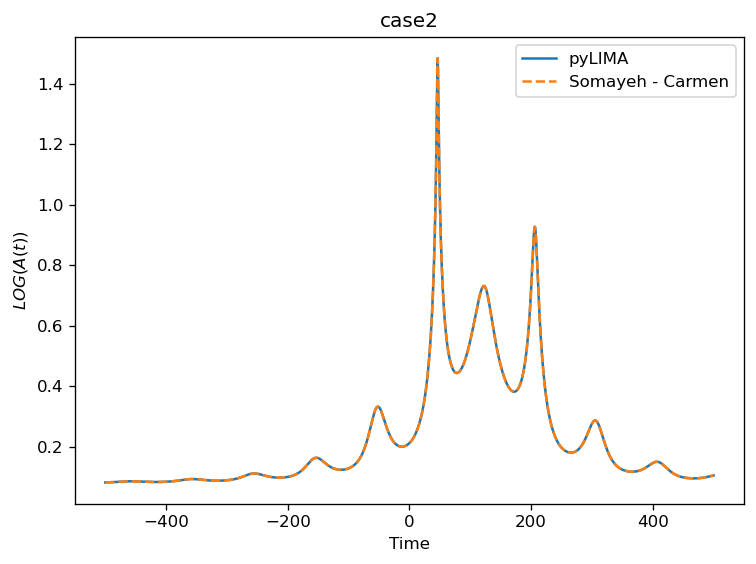

In [4]:
# ---- Event & telescope ----
simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

t = np.linspace(-500, 500, 5000)
lightcurve_sim = np.c_[t, np.full_like(t, 19.0), np.full_like(t, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth'
)
simulated_event.telescopes.append(tel)

case_name, df_row =  "case2", df_cases.loc["case2"]
params_list = [0]*12


xiE = df_row['xiE']
t_0 = df_row['t0']
t_E = df_row['tE']
P = df_row['P']
u_0 = df_row['u0']
phi_0 = df_row['xi_phase']
binary_flux_ratio = df_row['flux_ratio']
q = df_row['xi_mass_ratio']
fb = 0
fs=1
theta =0 
lambda_xi = df_row['xi_inclination']
omega = 2*np.pi/P
# for case_name, df_row in df_cases.iterrows():

params_list[0] = t_0#- df_row['xiE']*np.cos(df_row['xi_phase'])*df_row['tE'] 
params_list[1] = u_0# +df_row['xiE']*np.sin(df_row['xi_phase'])
params_list[2] = t_E 
params_list[3] = xiE*np.cos(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
params_list[4] = xiE*np.sin(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
params_list[5] = omega
params_list[6] = phi_0   #< ---- Orbital phase at t0
params_list[7] = lambda_xi #pi/2
params_list[8] = q
params_list[9] = binary_flux_ratio
params_list[10] = fs 
params_list[11] = fb 

model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', df_row['t0']]) # <--- Here I set t0,xi = t0
model.define_model_parameters()

# plt.close("all")
# %matplotlib inline
py_params = model.compute_pyLIMA_parameters(params_list)
print("pyLIMA parameters", py_params)

A = model.model_magnification(model.event.telescopes[0], py_params)

plt.figure(dpi=120)
plt.title(case_name)
plt.plot(t, np.log10(A), label="pyLIMA")



def F(f_s, A, fb):
    F_t = f_s*A+fb
    return F_t
def A_u(u):
    A_t = (u**2 + 2)/(u*(u**2 + 4)**(.5))
    return A_t
    
def A_Binary_SC(t,t_0, u_0,t_E,xiE, omega, phi_0,lambda_xi, q , binary_flux_ratio,fs,fb):
    '''
    Somayeh and Carmen implementation
    t (1-d array): time
    t_0(float): time of closest approach
    phi_0 (float): phase
    q(float): mass_ratio
    P (float): period in days
    xiE(float): separation from the source to the barycenter in theta_E units
    binary_flux_ratio(float): binary flux ratio
    
    '''
    
    Omega =  omega*(t - t_0) + phi_0
    a1 =  q/(1+q)     # primary's orbital radius
    a2 =  -1/(1+q) 
    tau =  ((t-t_0)/t_E)
    
    delta_tau = xiE*(np.cos(Omega)-np.cos(phi_0))
    delta_beta = xiE*np.sin(lambda_xi)*(np.sin(Omega)-np.sin(phi_0))
    u1 = np.sqrt((u_0 + a1*delta_beta)**2 + (tau + a1*delta_tau)**2)
    
    m1 = q/(1+q)
    
    # This is the pyLIMA election:
    dx2 = -(1/(1+q))*np.cos(Omega) - (q/(1+q))*np.cos(phi_0)
    dy2 = -(1/(1+q))*np.sin(Omega) - (q/(1+q))*np.sin(phi_0)
    u2 = np.sqrt((u_0 + xiE*dy2)**2 + (tau + xiE*dx2)**2)
    # u2 = np.sqrt((u_0 + a2*delta_beta)**2 + (tau + a2*delta_tau)**2)  # This is the election of Miyazaki with symetry around the barycenter
    A1_binary = A_u(u1)
    A2_binary = A_u(u2)
    A_binary = A1_binary + binary_flux_ratio*A2_binary
    # F_binary1 = F(f_s, A_binary, fb)
    return A_binary 

A_binary = A_Binary_SC(t,t_0, u_0,t_E,xiE, omega, phi_0,lambda_xi, q , binary_flux_ratio,fs,fb)

plt.plot(t, np.log10(A_binary), linestyle='--', label='Somayeh - Carmen')
plt.xlabel("Time")
plt.ylabel(r"$LOG(A(t))$")
plt.legend()
plt.tight_layout()
plt.show()


# from bokeh.plotting import figure, show
    # from bokeh.layouts import row
    
    # # Plot Bokeh para A(t)
    # p1 = figure(width=600, height=400, title=case_name,
    #             x_axis_label="Time", y_axis_label="A(t)")
    # p1.line(time_sim, A, legend_label="DSPL")
    
    # # Plot Bokeh para geometría PyLIMA
    # fig_mpl, p2 = pyLIMA_plots.plot_geometry(model, params_list, bokeh_plot=True)
    
    # show(row(p1, p2))


In [ ]:

def pspl_magnification(u):
    """Magnification for a point source–point lens."""
    return (u**2 + 2.0) / (u * np.sqrt(u**2 + 4.0))

def manual_xallarap_DSPL_magnification(model, py_params, tel_name='Simulation'):
    """
    Reconstruct A(t) directly using:
    - xallarap_shifts
    - compute_xallarap_curvature
    and the PSPL formula for each source.
    """
    # --- 1) Time and basic parameters ---
    tel = [t for t in model.event.telescopes if t.name == tel_name][0]
    time = tel.lightcurve['time'].value

    t0  = py_params['t0']
    tE  = py_params['tE']
    u0  = py_params['u0']

    tau  = (time - t0) / tE
    beta = np.full_like(tau, u0, dtype=float)

    # --- 2) Xallarap model used by PyLIMA in this model ---
    # For a model created as PSPLmodel(..., double_source=['Circular', t0_xi])
    xallarap_model = (model.double_source_model[0], model.double_source_model[1])
    # typically ('Circular', t0_xi) and that t0_xi usually matches t0

    # --- 3) Normalized orbits of the two sources (in the S basis) ---
    # Returns:
    #   separation_1_1, separation_2_1  -> S1x(t), S1y(t) for source 1
    #   separation_1_2, separation_2_2  -> S2x(t), S2y(t) for source 2
    S1x, S1y, S2x, S2y = xallarap_shifts(xallarap_model, time, py_params, body='primary')

    # --- 4) Xallarap vector components (xi_para, xi_perp) ---
    xiE = np.array([py_params['xi_para'], py_params['xi_perp']], dtype=float)

    # To use compute_xallarap_curvature we need delta_positions as [d_N, d_E]
    # Here we interpret (Sx, Sy) as (N, E) in normalized Einstein units.
    S1 = np.vstack([S1x, S1y])
    S2 = np.vstack([S2x, S2y])

    # Displacements (delta_tau, delta_beta) for each source
    d_tau1, d_beta1 = compute_xallarap_curvature(xiE, S1)
    d_tau2, d_beta2 = compute_xallarap_curvature(xiE, S2)

    # --- 5) Full trajectories of each source in (tau, beta) ---
    tau1  = tau + d_tau1
    beta1 = beta + d_beta1

    tau2  = tau + d_tau2
    beta2 = beta + d_beta2

    # --- 6) Lens–source separation in Einstein units ---
    u1 = np.sqrt(tau1**2 + beta1**2)
    u2 = np.sqrt(tau2**2 + beta2**2)

    # --- 7) PSPL magnification for each source ---
    A1 = pspl_magnification(u1)
    A2 = pspl_magnification(u2)

    # --- 8) Combine the two sources using q_flux of the corresponding band ---
    # In your example: q_flux_G = 0.1 (flux of source 2 / flux of source 1).
    q_flux = py_params['q_flux_G']

    # If the baseline flux is F1 + F2, the effective magnification is:
    A = A1 + q_flux * A2

    return time, A

# Example of usage with your model and parameters:
time_manual, A_manual = manual_xallarap_DSPL_magnification(model, py_params)
A_pyLIMA = model.model_magnification(model.event.telescopes[0], py_params)

plt.xlabel("Time [days]")
plt.ylabel("A(t)")
plt.axvline(py_params["t0"])
plt.plot(time_manual, np.log10(A_manual), label='Manual xallarap DSPL')
plt.plot(time_sim, np.log10(A_pyLIMA), '--', label='PyLIMA model_magnification')
plt.legend(); plt.show()


In [ ]:
simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

time_sim = np.linspace(-400,400, 500)
lightcurve_sim = np.c_[time_sim, np.full_like(time_sim, 19.0), np.full_like(time_sim, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth')

simulated_event.telescopes.append(tel)


# for case_name, df_row in df_cases.iterrows():
    
case_name  = "case4-3b",
df_row = df_cases.loc[case_name]

params_list = [0]*12
delta_tref = 0
t_ref = 50 + delta_tref
params_list[0] = df_row['t0']
params_list[1] = df_row['u0']
params_list[2] = df_row['tE']
params_list[3] = df_row['xiE']*np.cos(np.pi/2)
params_list[4] = df_row['xiE']*np.sin(np.pi/2)
params_list[5] = 2*np.pi/df_row['P']
params_list[6] = df_row['xi_phase']
params_list[7] = df_row['xi_inclination']
params_list[8] = df_row['xi_mass_ratio']
params_list[9] = df_row['flux_ratio']
params_list[10] = 1 
params_list[11] = 1 

model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', t_ref])
model.define_model_parameters()

py_params = model.compute_pyLIMA_parameters(params_list)
from pyLIMA.simulations import simulator
simulator.simulate_lightcurve(model, py_params)
print("pyLIMA parameters", py_params)

A = model.model_magnification(model.event.telescopes[0], py_params)

model2 = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0])
A2 = model2.model_magnification(model2.event.telescopes[0], model2.compute_pyLIMA_parameters(params_list[0:3]))

plt.plot(time_sim, A, label="DSPL")
plt.plot(time_sim, np.array(A2)+1, label="PSPL")

    

In [ ]:
# help(model2)
# help(model2.sources_trajectory)

In [ ]:
# model2.event.telescopes[0].lightcurve

In [ ]:
positions= model.sources_trajectory(model.event.telescopes[0], model.compute_pyLIMA_parameters(params_list),data_type="photometry")
plt.plot(positions[2],positions[3])
plt.plot(positions[0],positions[1])

In [ ]:
# model2.compute_pyLIMA_parameters(params_list[0:3])